In [ ]:
import pandas as pd
ogdata = pd.read_csv('titanic_augmented.csv')
ogdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
#1.Data splitting
X = ogdata.drop('Survived',axis = 1)
y = ogdata['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42,stratify = y)


In [6]:
#2.Data preprocessing:
#ogdata.isnull().sum()
#Imputing missing values
train_age_median = X_train['Age'].median()
train_embarked_mode = X_train['Embarked'].mode()[0]
X_train['Age'] =X_train['Age'].fillna(train_age_median)
X_test['Age'] =X_test['Age'].fillna(train_age_median)
X_train['Embarked'] =X_train['Embarked'].fillna(train_embarked_mode)
X_test['Embarked'] =X_test['Embarked'].fillna(train_embarked_mode)
# turn object to int
gender_map = {'female': 1, 'male': 0}
X_train['Sex'] = X_train['Sex'].map(gender_map)
X_test['Sex'] = X_test['Sex'].map(gender_map)
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
X_train['Embarked'] = X_train['Embarked'].map(embarked_map)
X_test['Embarked'] = X_test['Embarked'].map(embarked_map)
#nomalization
train_fare_mean = X_train['Fare'].mean()
train_fare_std = X_train['Fare'].std()

X_train['Fare_Scaled'] = (X_train['Fare'] - train_fare_mean) / train_fare_std

X_test['Fare_Scaled'] = (X_test['Fare'] - train_fare_mean) / train_fare_std

train_age_min = X_train['Age'].min()
train_age_max = X_train['Age'].max()

X_train['Age_Scaled'] = (X_train['Age'] - train_age_min) / (train_age_max - train_age_min)
X_test['Age_Scaled'] = (X_test['Age'] - train_age_min) / (train_age_max - train_age_min)

ogdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  name_length        891 non-null    int64  
 13  title              891 non-null    object 
 14  title_group        891 non-null    object 
 15  family_size        891 non-null    int64  
 16  is_alone           891 non

In [7]:
print(X_train[['Age_Scaled','Fare_Scaled','Sex','Embarked']].head())

     Age_Scaled  Fare_Scaled  Sex  Embarked
486    0.434531     1.239468    1         0
238    0.233476    -0.435702    0         0
722    0.421965    -0.383023    0         0
184    0.044986    -0.192855    1         0
56     0.258608    -0.435702    1         0


In [8]:
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(X_train_numeric,y_train)
ranking = pd.Series(rf_model.feature_importances_ ,index = X_train_numeric.columns).sort_values(ascending = False)
print('the ranking is :')

print(ranking)

the ranking is :
Sex                  0.190794
fare_per_person      0.075850
name_length          0.061828
Fare                 0.061410
Fare_Scaled          0.054756
Age_Scaled           0.052910
cabin_score          0.052838
booking_reference    0.052121
age_fare_ratio       0.051111
cabin_room_number    0.050650
Age                  0.050173
PassengerId          0.049222
service_id           0.046698
Pclass               0.034880
name_word_count      0.025451
ticket_group_size    0.025139
family_size          0.019738
SibSp                0.015391
Embarked             0.013049
Parch                0.010320
is_alone             0.005674
dtype: float64


In [9]:
#WE will consider the first 6 variables

final_features= ['Pclass', 'Sex', 'Age_Scaled',  'fare_per_person', 

    'name_length','cabin_score']

X_train_final = X_train[final_features]

y_train_final = y_train

In [10]:
#4Model building and training
print('logistic_models')
param_grid = {
    'C':[0.01,0.1,1,10,100],
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear']}
lr = LogisticRegression(random_state=42)
gridsearch = GridSearchCV(lr,param_grid, cv=5, scoring = 'accuracy')
gridsearch.fit(X_train_final, y_train)
print("best param:", gridsearch.best_params_)
print("best scores:", gridsearch.best_score_)

print('DecisionTree_models')
dt_param_grid = {
    "max_depth":[3,5,7,9,None],
    "min_samples_leaf":[1,2,5,10],
    'criterion': ['gini', 'entropy']}
dt=DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5)
dt_grid.fit(X_train_final, y_train)

print("best param:", dt_grid.best_params_)
print("best scores:", dt_grid.best_score_)

print('KNN')
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] 
}


knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(X_train_final, y_train)

print("best param:", knn_grid.best_params_)
print("best scores:", knn_grid.best_score_)

logistic_models
best param: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
best scores: 0.7994052294916395
DecisionTree_models
best param: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10}
best scores: 0.8143754909662215
KNN
best param: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
best scores: 0.7484794074739086


In [11]:
#5Hyperparameter tuning
final_features = ['Pclass', 'Sex', 'Age_Scaled', 'fare_per_person', 'name_length', 'cabin_score']
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

# Re-fit models
print("\nRe-training models to match the new feature order...")
gridsearch.fit(X_train_final, y_train)
dt_grid.fit(X_train_final, y_train)   
knn_grid.fit(X_train_final, y_train) 

best_lr = gridsearch.best_estimator_
best_dt = dt_grid.best_estimator_
best_knn = knn_grid.best_estimator_

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

final_models = {
    "Logistic Regression": best_lr, 
    "Decision Tree": best_dt, 
    "KNN": best_knn
}

test_accuracies = {}

print("\n--- Final Test Set Evaluation Results ---")
for name, model in final_models.items():
    y_pred = model.predict(X_test_final)
    acc = accuracy_score(y_test, y_pred)
    test_accuracies[name] = acc
    print(f"\nModel: {name}")
    print(f"Test Accuracy: {acc:.4f}")
    # Reporting detailed metrics as per project requirements
    print(classification_report(y_test, y_pred))



Re-training models to match the new feature order...

--- Final Test Set Evaluation Results ---

Model: Logistic Regression
Test Accuracy: 0.7848
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       137
           1       0.71      0.74      0.73        86

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.79       223


Model: Decision Tree
Test Accuracy: 0.7892
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       137
           1       0.75      0.67      0.71        86

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223


Model: KNN
Test Accuracy: 0.6861
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       137
           1

/var/folders/_q/ydh1mm8x4h924sl_vvyg0ldc0000gn/T/ipykernel_81433/2004980284.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_series.index, y=performance_series.values, palette='viridis')


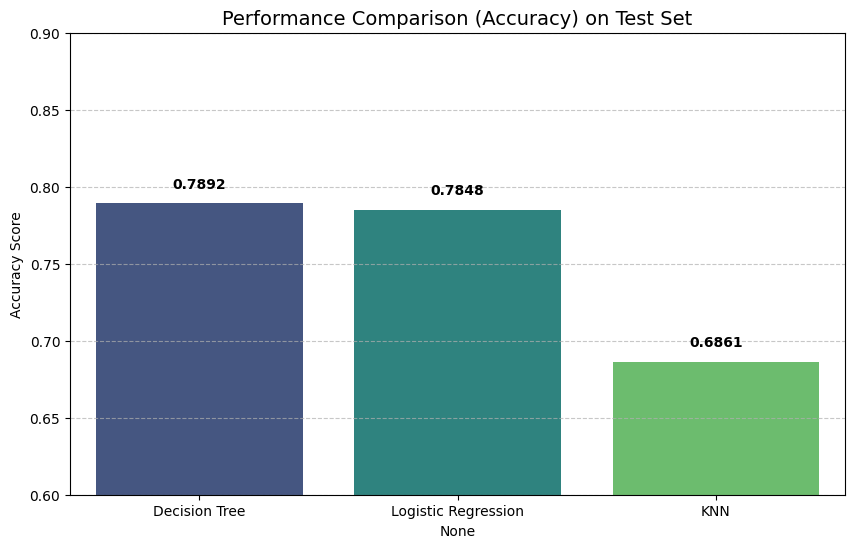

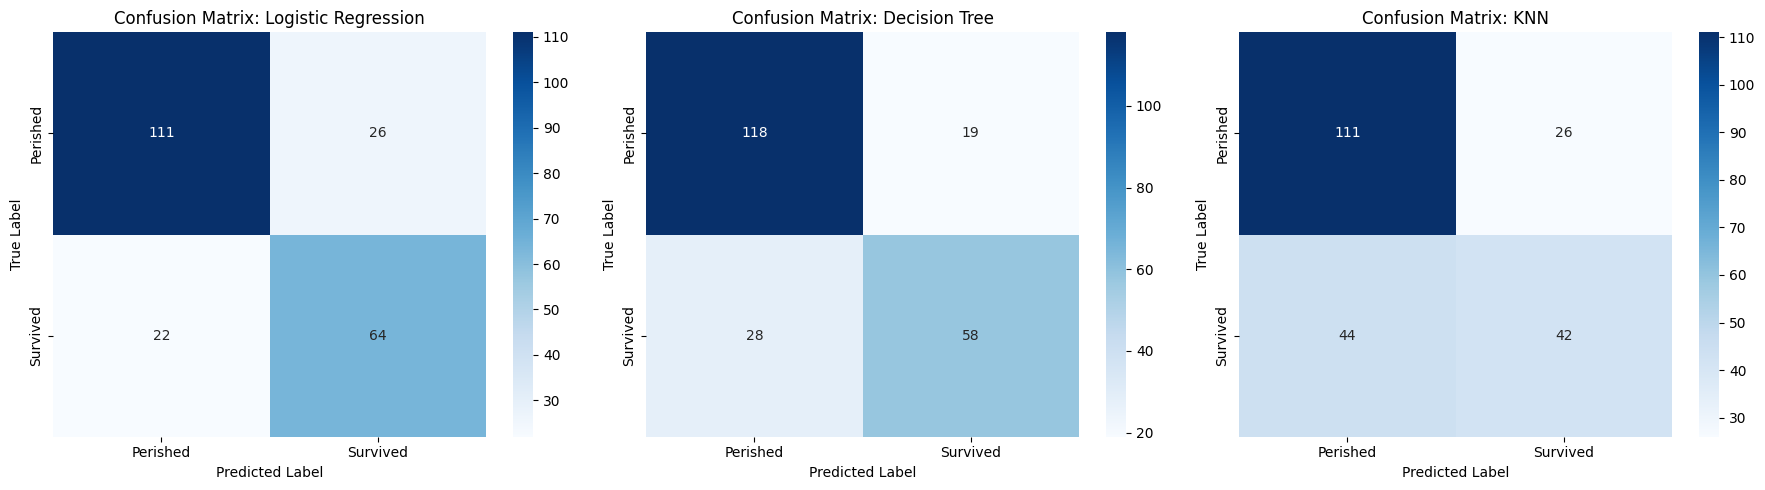

In [12]:
#6esult evaluation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Visualization 1: Accuracy Comparison Chart ---
plt.figure(figsize=(10, 6))
# Convert results to a Series for easier plotting
performance_series = pd.Series(test_accuracies).sort_values(ascending=False)

sns.barplot(x=performance_series.index, y=performance_series.values, palette='viridis')

# Add values on top of the bars
for i, v in enumerate(performance_series.values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')

plt.ylim(0.6, 0.9) # Focus on the relevant accuracy range
plt.title('Performance Comparison (Accuracy) on Test Set', fontsize=14)
plt.ylabel('Accuracy Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Visualization 2: Confusion Matrices ---
# Visualizing how models are misclassifying (False Positives vs False Negatives)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(final_models.items()):
    y_pred = model.predict(X_test_final)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Perished', 'Survived'], 
                yticklabels=['Perished', 'Survived'])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()